# Geographic Information Systems-Coğrafi Bilgi Sistemleri

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7FW_GBU7y2xeUis-tHKzeSbmP8LN_E1ZRnw&s'>

In [1]:
#%pip install --upgrade numpy
#%pip install --upgrade leafmap
#%pip install --upgrade rasterio
#%pip install --upgrade pandas plotly xarray dask

In [2]:
#%pip install -U leafmap

In [3]:
#%pip install rasterio

In [4]:
#pip install geopandas

In [1]:
import plotly.graph_objects as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [2]:
import leafmap

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('2014_World_Power_Consumption')

In [5]:
df.head()

,Country,Power Consumption KWH,Text
0,China,5.523000e+12,"China 5,523,000,000,000"
1,United States,3.832000e+12,"United 3,832,000,000,000"
2,European,2.771000e+12,"European 2,771,000,000,000"
3,Russia,1.065000e+12,"Russia 1,065,000,000,000"
4,Japan,9.210000e+11,"Japan 921,000,000,000"


In [6]:
data=dict(
    type="choropleth",
    colorscale='Viridis',
    reversescale=True,
    locations=df["Country"],
    locationmode="country names",
    z=df["Power Consumption KWH"],
    text=df["Country"],
    colorbar={'title':"World Power Consunmption"}
)
layout=dict(title="World Power Consunmption",
            geo=dict(showframe=False,projection={'type':'mercator'})
            )

In [11]:
choromap=go.Figure(data=data,layout=layout)
iplot(choromap,validate=False)

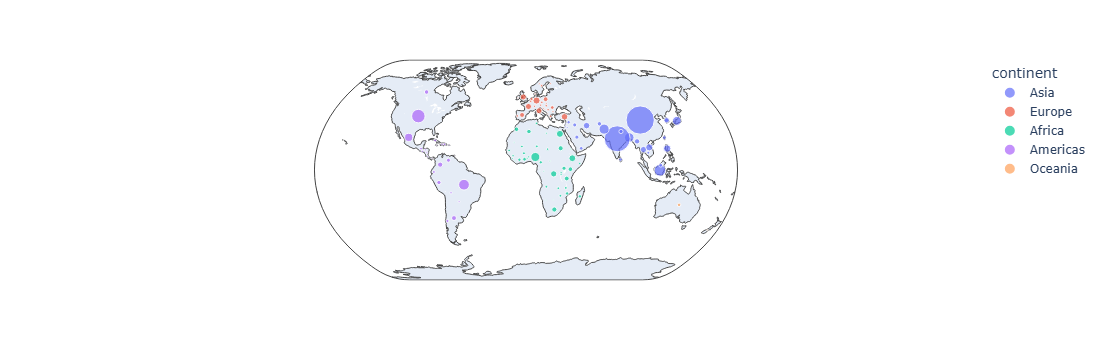

In [7]:
import plotly.express as px
df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     projection="natural earth")
fig.show()

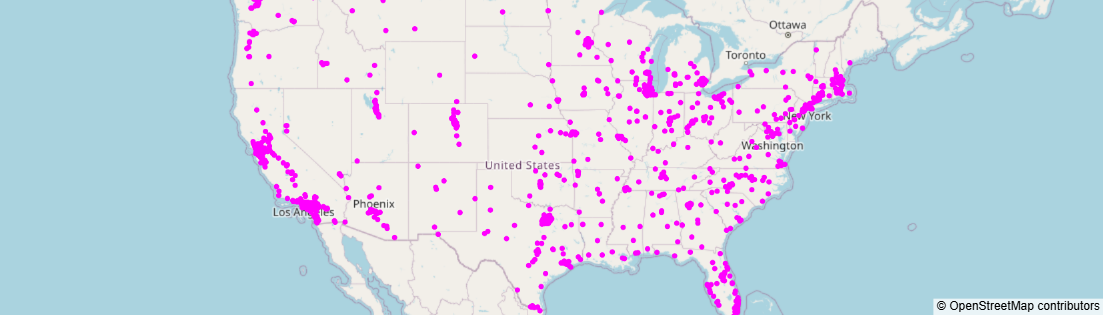

In [8]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

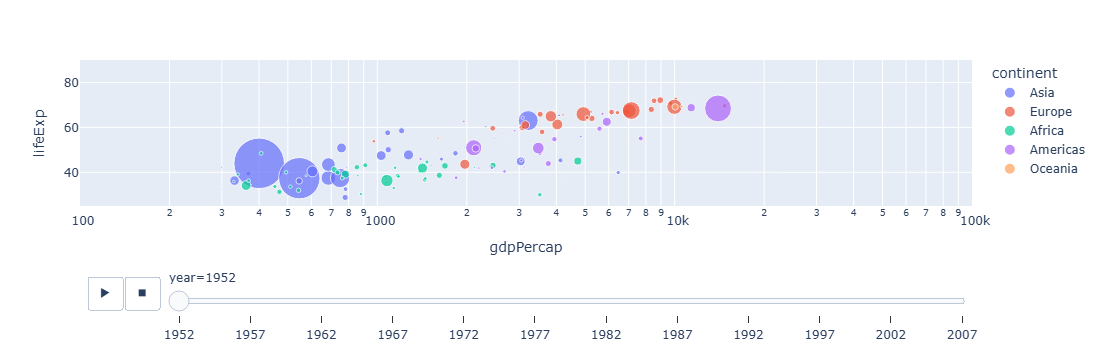

In [9]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

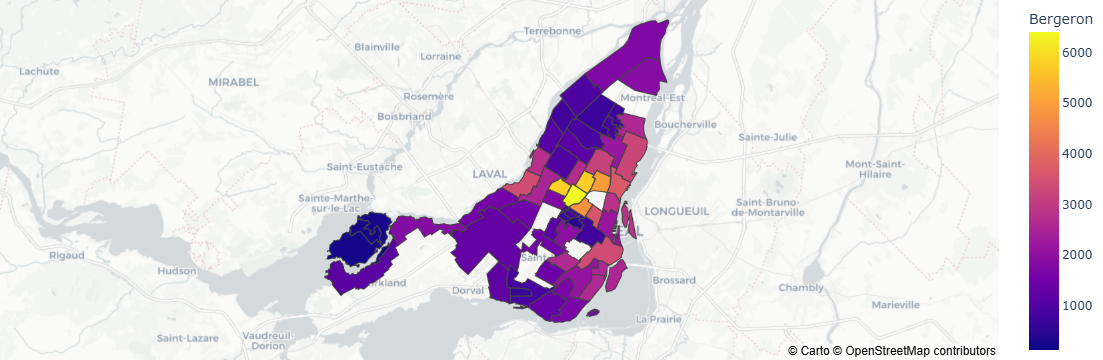

In [11]:
import plotly.express as px
df=px.data.election()
geojson=px.data.election_geojson()
fig=px.choropleth_mapbox(df, geojson=geojson,color='Bergeron',locations='district',featureidkey='properties.district',center={'lat':45.5517,'lon':-73.7073},mapbox_style='carto-positron',zoom=9)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [12]:
import leafmap.foliumap as leafmap

In [13]:
m=leafmap.Map()
m.add_basemap('USGS 3DEP Elevation')
colors=['006633','E5FFCC','662A00','D8D8D8','F5F5F5']
vmin=0
vmax=4000
m.add_colorbar(colors=colors,vmin=vmin,vmax=vmax)
m

In [14]:
url='https://opengeos.org/data/landsat/peru.zip'
leafmap.download_file(url)

Downloading...
From: https://opengeos.org/data/landsat/peru.zip
To: C:\Users\ibrahim\Documents\Yapay-Zeka\Day10\peru.zip
100%|█████████████████████████████████████████████████████████████████████████████| 33.8M/33.8M [00:05<00:00, 6.49MB/s]


Extracting files...


'C:\\Users\\ibrahim\\Documents\\Yapay-Zeka\\Day10\\peru.zip'

In [15]:
images='peru/*.tif'

In [17]:
m=leafmap.Map()
m.add_basemap('HYBRID')
m

In [18]:
m.to_html('mymap.html')